## This notebook contains the filled in code for ShortcourseExampleBase.ipynb

In [1]:
# Import necessary modules 
from earthscopestraintools.mseed_tools import ts_from_mseed
from earthscopestraintools.gtsm_metadata import GtsmMetadata
from earthscopestraintools.timeseries import plot_timeseries_comparison

# Establish logging session
import logging
logger = logging.getLogger()
logging.basicConfig(
        format="%(message)s", level=logging.INFO
    )


## Aquire data and metadata


In [2]:
# Get metadata and data

# First, set parameters for the seed code
network = 'PB' 
station = 'B073'
location = 'T0' # The location code for strain is T0
sample_rate = 'LS*' # LS = 1 Hz, * denotes data from all 4 gauges should be acquired

start = '2012-05-05T00:00:00.00'
end = '2012-05-10T00:00:00.00'

# Get the metadata
meta = GtsmMetadata(network=network,station=station)

# Get the data from the IRIS DMC 
strain_raw = ts_from_mseed(network=network,station=station,location=location,channel=sample_rate,start=start,end=end)


PB B073 Loading T0 LS* from 2012-05-05T00:00:00.00 to 2012-05-10T00:00:00.00 from Earthscope DMC miniseed
    Trace 1. 2012-05-05T00:00:00.000000Z:2012-05-10T00:00:00.000000Z mapping LS1 to CH0
    Trace 2. 2012-05-05T00:00:00.000000Z:2012-05-10T00:00:00.000000Z mapping LS2 to CH1
    Trace 3. 2012-05-05T00:00:00.000000Z:2012-05-10T00:00:00.000000Z mapping LS3 to CH2
    Trace 4. 2012-05-05T00:00:00.000000Z:2012-05-10T00:00:00.000000Z mapping LS4 to CH3
    Found 0 epochs with nans, 123.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.03%
  Converting 999999 gap fill values to nan
    Found 123 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.03%


In [3]:
# Examine the metadata contents through the .show() call 
meta.show()

network: PB
station: B073
latitude: 35.9467
longitude: -120.4717
gap: 0.0001
orientation (CH0EofN): 270.1
reference_strains:
 {'linear_date': '2006:305', 'CH0': 48574128, 'CH1': 53068331, 'CH2': 47998858, 'CH3': 48278313}
strain_matrices:
lab:
 [[ 0.29629699  0.5185182   0.29629592  0.22222222]
 [ 0.37081499 -0.18406666 -0.29718805  0.11043972]
 [ 0.12700876  0.32139321 -0.25556544 -0.19283653]]
ER2010:
 [[-0.88182914 -0.81225113 -0.57421371 -0.60171802]
 [ 0.47546729 -0.31102462 -0.63122543 -0.04953135]
 [ 0.16962093  0.42674938 -0.62218982 -0.47306098]]
KH2013:
 [[-0.762 -1.07  -1.169 -0.711]
 [ 0.482 -0.366 -0.613 -0.032]
 [ 0.188  0.424 -0.677 -0.47 ]]
CH2024:
 None
CH_prelim:
 None
EM2024:
 None
atmp_response:
 {'CH0': -0.012, 'CH1': -0.01, 'CH2': -0.0079, 'CH3': -0.0076}
tidal_params:
 {('CH0', 'M2', 'phz'): '-172.163', ('CH0', 'M2', 'amp'): '10.679', ('CH0', 'M2', 'doodson'): '2 0 0 0 0 0', ('CH0', 'O1', 'phz'): '-167.318', ('CH0', 'O1', 'amp'): '2.925', ('CH0', 'O1', 'doodson')

In [4]:
# Run this code cellto look at available attributes and functions of strain_raw
print('Attributes:')
funcs = []
print(list(vars(strain_raw).keys()))
for s in dir(strain_raw): 
    if s.startswith('_') != True and s not in vars(strain_raw).keys(): funcs.append(s)
print('Functions')
print(funcs)


Attributes:
['data', 'columns', 'quality_df', 'period', 'series', 'units', 'level', 'network', 'station', 'name', 'nans', 'nines', 'epochs', 'gap_percentage']
Functions
['append', 'apply_calibration_matrix', 'apply_corrections', 'baytap_analysis', 'butterworth_filter', 'calculate_magnitude', 'calculate_offsets', 'calculate_pressure_correction', 'calculate_tide_correction', 'check_for_gaps', 'decimate_1s_to_300s', 'decimate_to_hourly', 'double_exponential_trend_correction', 'dynamic_strain', 'get_eig', 'interpolate', 'linear_trend_correction', 'linearize', 'plot', 'remove_fill_values', 'save_csv', 'set_data', 'set_local_tdb_uri', 'set_s3_tdb_uri', 'set_units', 'show_flagged_data', 'show_flags', 'stats', 'strain_video', 'truncate']


In [5]:
# Preview the data with the attribute
strain_raw.data

,CH0,CH1,CH2,CH3
time,,,,
2012-05-05 00:00:00,47722837.0,56816405.0,40145631.0,41810278.0
2012-05-05 00:00:01,47722833.0,56816404.0,40145635.0,41810277.0
2012-05-05 00:00:02,47722848.0,56816403.0,40145626.0,41810281.0
2012-05-05 00:00:03,47722845.0,56816403.0,40145628.0,41810279.0
2012-05-05 00:00:04,47722836.0,56816402.0,40145636.0,41810278.0
...,...,...,...,...
2012-05-09 23:59:56,47721667.0,56820317.0,40139116.0,41804030.0
2012-05-09 23:59:57,47721667.0,56820320.0,40139113.0,41804027.0
2012-05-09 23:59:58,47721669.0,56820316.0,40139113.0,41804031.0


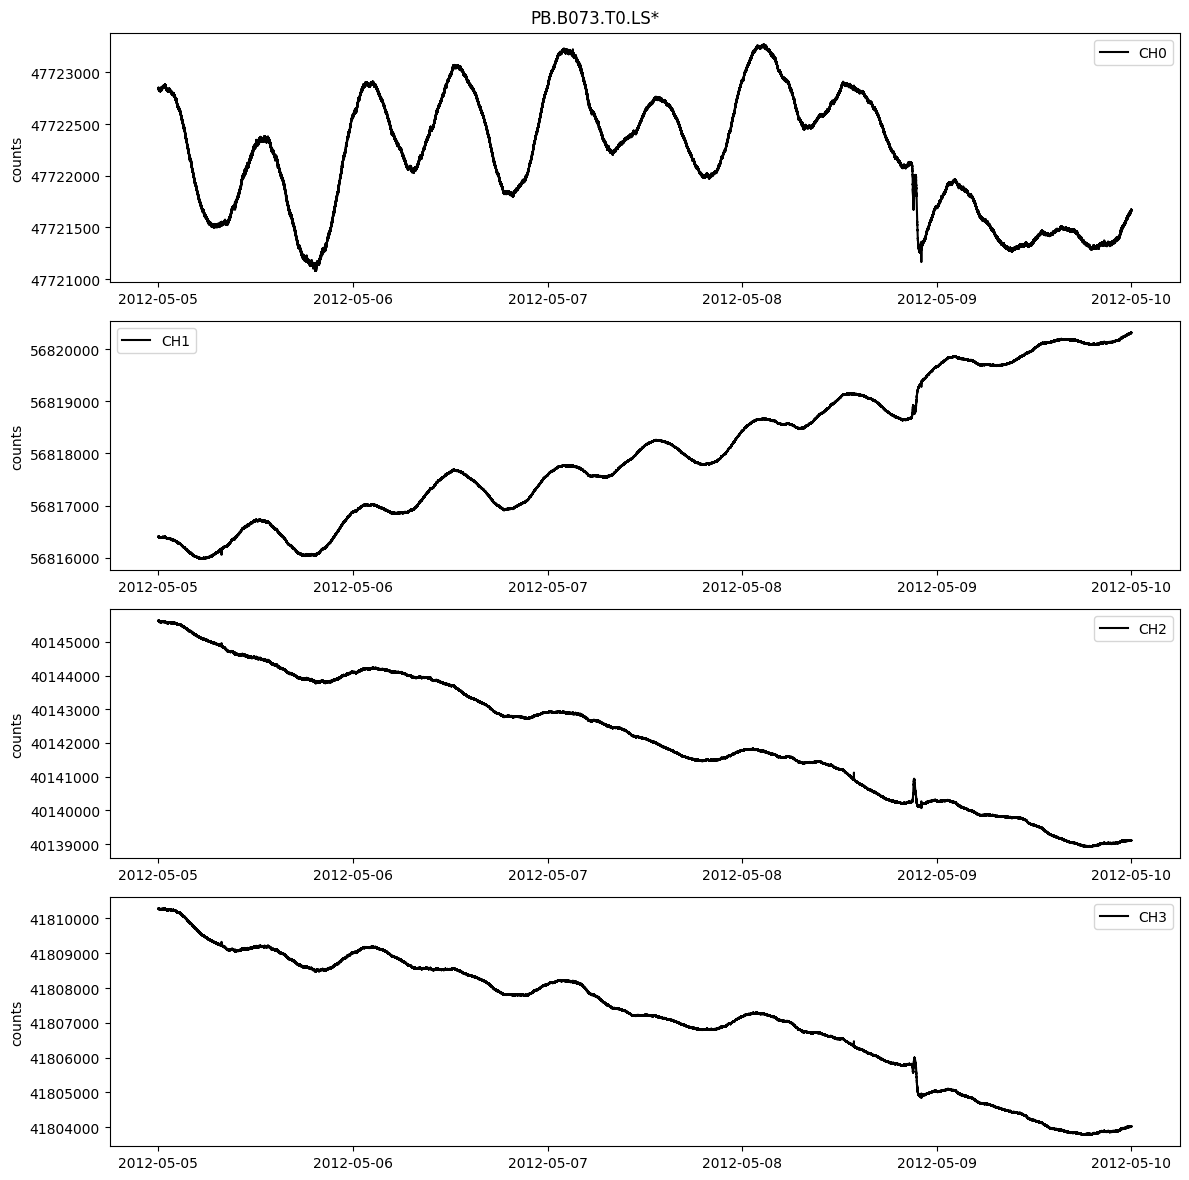

In [6]:
# Use one of the functions to plot the data
strain_raw.plot()

## Filter and decimate to 5 minutes


In [7]:
strain_raw5min = strain_raw.decimate_1s_to_300s()

Decimating to 300s
Interpolating data using method=linear and limit=3600
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%


## Linearization


In [8]:
# Linearize
gauge_microstrain = strain_raw5min.linearize(reference_strains=meta.reference_strains,gap=meta.gap)
# Preview the data
gauge_microstrain.data

Converting raw counts to microstrain


    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%


,CH0,CH1,CH2,CH3
time,,,,
2012-05-05 00:00:00,-36.396960,212.571047,-290.014799,-247.021153
2012-05-05 00:05:00,-36.396876,212.570985,-290.014831,-247.021153
2012-05-05 00:10:00,-36.397002,212.570492,-290.015249,-247.021391
2012-05-05 00:15:00,-36.397297,212.569937,-290.015794,-247.021696
2012-05-05 00:20:00,-36.397381,212.569691,-290.016115,-247.021900
...,...,...,...,...
2012-05-09 23:40:00,-36.448817,212.810036,-290.224189,-247.234073
2012-05-09 23:45:00,-36.448187,212.810406,-290.224061,-247.233768
2012-05-09 23:50:00,-36.447808,212.810714,-290.224125,-247.233700


## Calculate regional strains

In [9]:
# Which strain matrices are available in the metadata?
meta.strain_matrices

{'lab': array([[ 0.29629699,  0.5185182 ,  0.29629592,  0.22222222],
        [ 0.37081499, -0.18406666, -0.29718805,  0.11043972],
        [ 0.12700876,  0.32139321, -0.25556544, -0.19283653]]),
 'ER2010': array([[-0.88182914, -0.81225113, -0.57421371, -0.60171802],
        [ 0.47546729, -0.31102462, -0.63122543, -0.04953135],
        [ 0.16962093,  0.42674938, -0.62218982, -0.47306098]]),
 'KH2013': array([[-0.762, -1.07 , -1.169, -0.711],
        [ 0.482, -0.366, -0.613, -0.032],
        [ 0.188,  0.424, -0.677, -0.47 ]]),
 'CH2024': None,
 'CH_prelim': None,
 'EM2024': None}

In [10]:
# Apply both strain matrices to the gauge microstrain
lab_strain = gauge_microstrain.apply_calibration_matrix(meta.strain_matrices['lab'])
tide_strain = gauge_microstrain.apply_calibration_matrix(meta.strain_matrices['ER2010'])

Applying None matrix:
 [[ 0.29629699  0.5185182   0.29629592  0.22222222]
 [ 0.37081499 -0.18406666 -0.29718805  0.11043972]
 [ 0.12700876  0.32139321 -0.25556544 -0.19283653]]
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
Applying None matrix:
 [[-0.88182914 -0.81225113 -0.57421371 -0.60171802]
 [ 0.47546729 -0.31102462 -0.63122543 -0.04953135]
 [ 0.16962093  0.42674938 -0.62218982 -0.47306098]]
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%


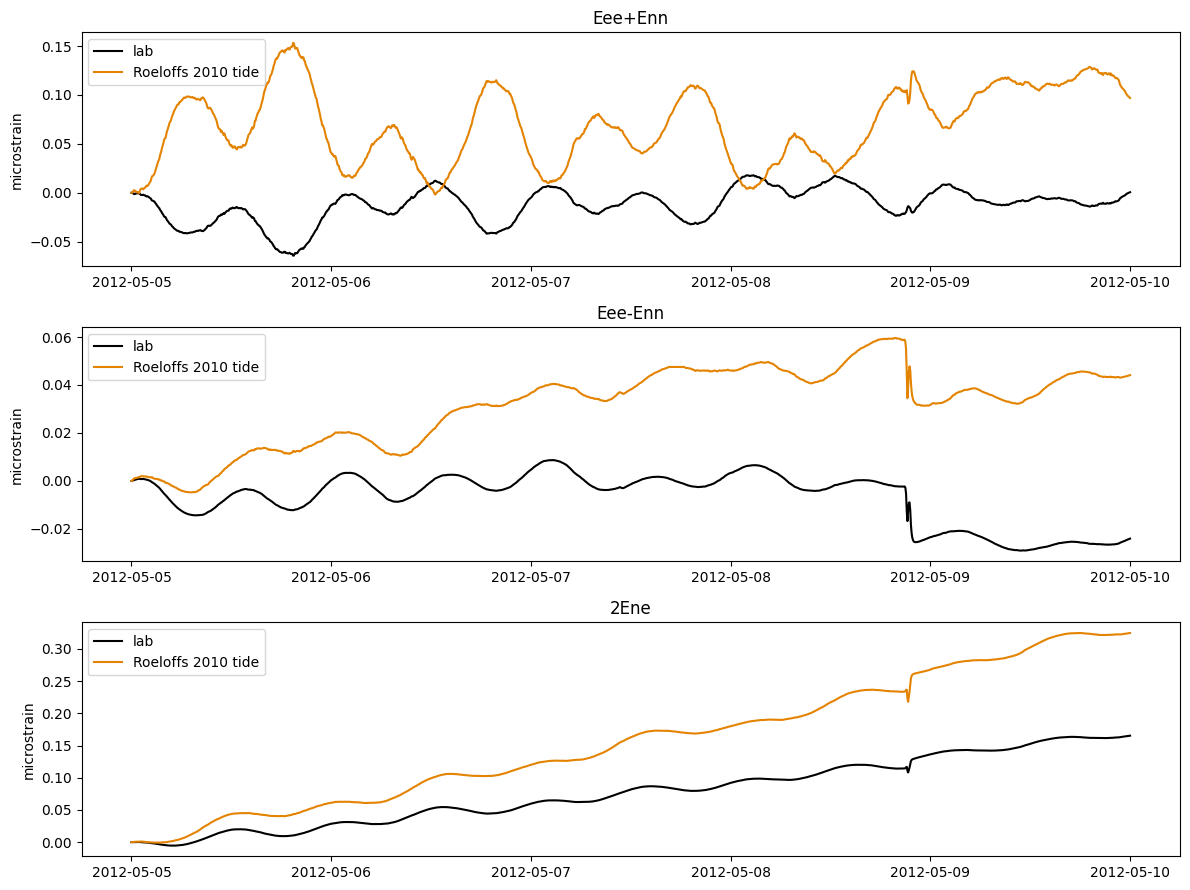

In [11]:
# Use a tool to plot a comparison of the matrices
plot_timeseries_comparison([lab_strain,tide_strain],names=['lab','Roeloffs 2010 tide'],zero=True)

## Signal correction

### Barometric Pressure Correction


In [12]:
# First, get the atmospheric pressure data
atmp = ts_from_mseed(network=network,station=station,location='TS',channel='RDO',
                     scale_factor=0.001,start=start,end=end) # scale factor

PB B073 Loading TS RDO from 2012-05-05T00:00:00.00 to 2012-05-10T00:00:00.00 from Earthscope DMC miniseed
    Trace 1. 2012-05-05T00:00:00.000000Z:2012-05-10T00:00:00.000000Z mapping RDO to atmp
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
  Converting 999999 gap fill values to nan
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%


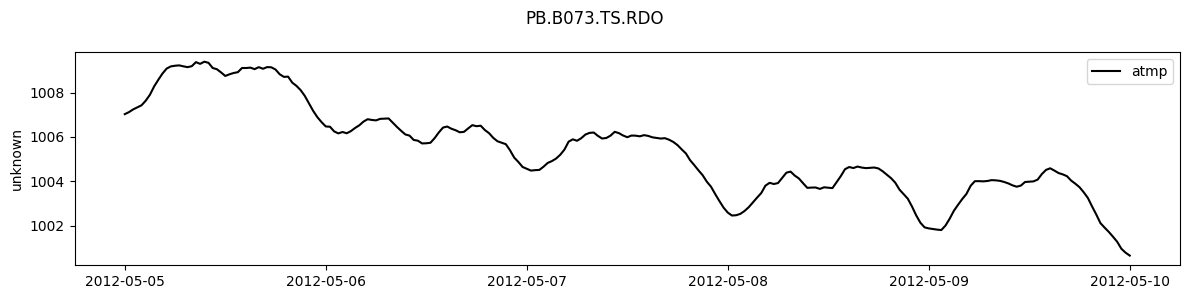

In [13]:
# Plot the correction
atmp.plot()

In [14]:
# Examine the pressure response coefficients per gauge
# in microstrain/hPa
meta.atmp_response

{'CH0': -0.012, 'CH1': -0.01, 'CH2': -0.0079, 'CH3': -0.0076}

In [15]:
# Interpolate the pressure data to the timeseries
atmp_interp = atmp.interpolate(new_index=gauge_microstrain.data.index, series='hpa')

Interpolating data using method=linear and limit=12


    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%


In [16]:
# Calculate the pressure correction
atmp_c = atmp_interp.calculate_pressure_correction(response_coefficients=meta.atmp_response)

Calculating pressure correction
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%


Applying corrections
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%


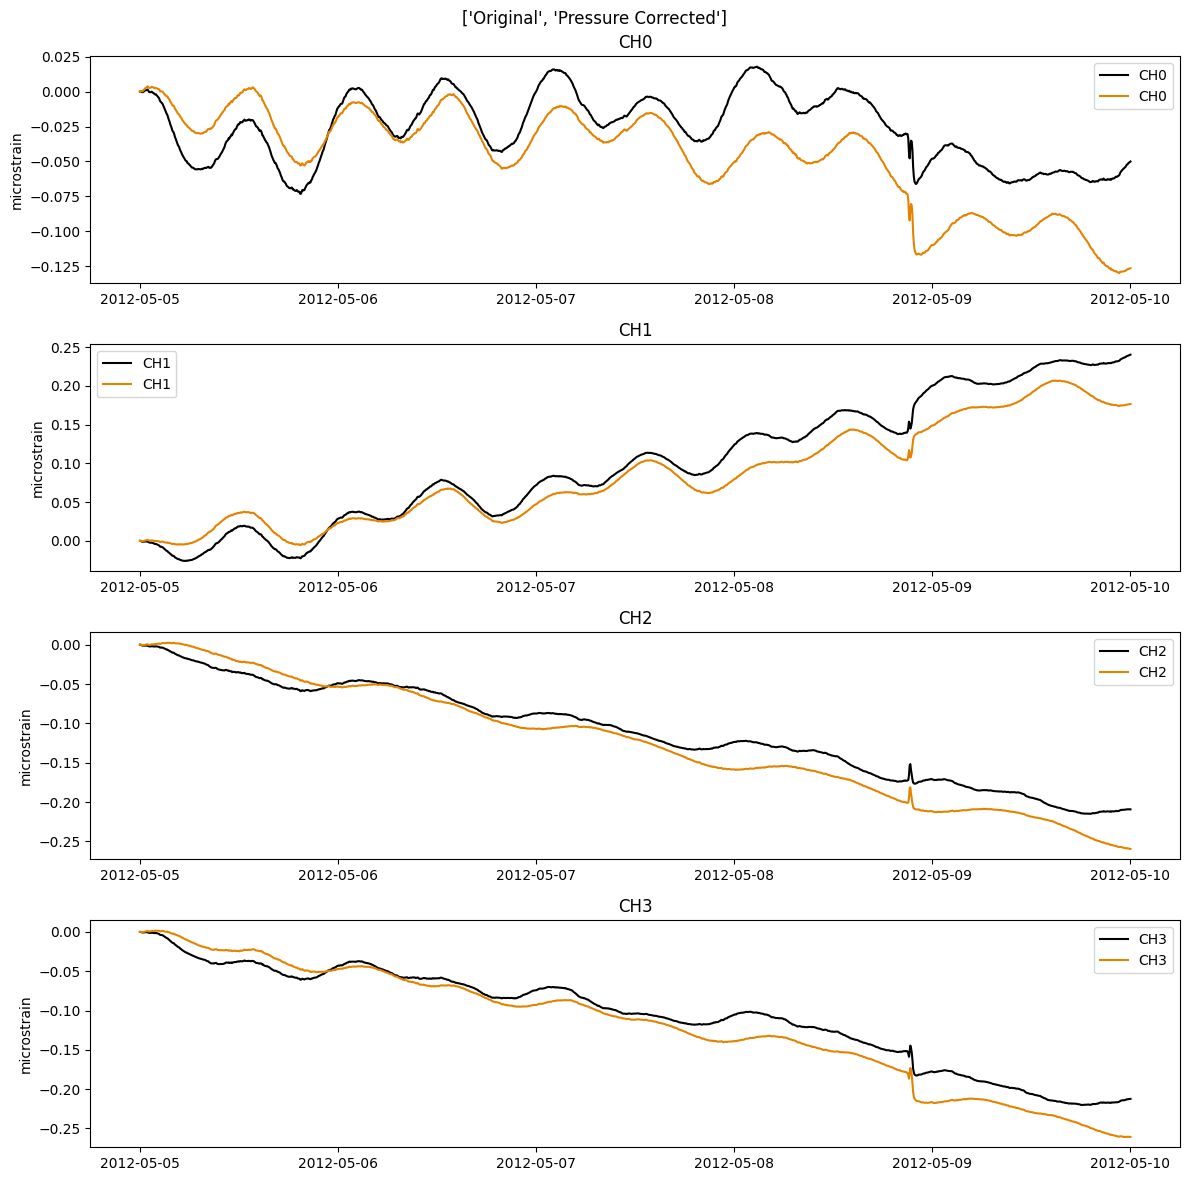

In [17]:
# Plot the applied corrections
# The .apply_corrections() function is useful for this purpose
plot_timeseries_comparison([gauge_microstrain,gauge_microstrain.apply_corrections([atmp_c])],
                           ['Original','Pressure Corrected'],zero=True)

### Tide Correction


In [18]:
# Take a look at the metadata for the tides
meta.tidal_params

{('CH0', 'M2', 'phz'): '-172.163',
 ('CH0', 'M2', 'amp'): '10.679',
 ('CH0', 'M2', 'doodson'): '2 0 0 0 0 0',
 ('CH0', 'O1', 'phz'): '-167.318',
 ('CH0', 'O1', 'amp'): '2.925',
 ('CH0', 'O1', 'doodson'): '1-1 0 0 0 0',
 ('CH0', 'P1', 'phz'): '-175.695',
 ('CH0', 'P1', 'amp'): '1.056',
 ('CH0', 'P1', 'doodson'): '1 1-2 0 0 0',
 ('CH0', 'K1', 'phz'): '-160.382',
 ('CH0', 'K1', 'amp'): '2.704',
 ('CH0', 'K1', 'doodson'): '1 1 0 0 0 0',
 ('CH0', 'N2', 'phz'): '179.368',
 ('CH0', 'N2', 'amp'): '1.958',
 ('CH0', 'N2', 'doodson'): '2-1 0 1 0 0',
 ('CH0', 'S2', 'phz'): '-175.747',
 ('CH0', 'S2', 'amp'): '6.275',
 ('CH0', 'S2', 'doodson'): '2 2-2 0 0 0',
 ('CH1', 'M2', 'phz'): '-148.679',
 ('CH1', 'M2', 'amp'): '7.809',
 ('CH1', 'M2', 'doodson'): '2 0 0 0 0 0',
 ('CH1', 'O1', 'phz'): '143.932',
 ('CH1', 'O1', 'amp'): '4.237',
 ('CH1', 'O1', 'doodson'): '1-1 0 0 0 0',
 ('CH1', 'P1', 'phz'): '139.121',
 ('CH1', 'P1', 'amp'): '1.976',
 ('CH1', 'P1', 'doodson'): '1 1-2 0 0 0',
 ('CH1', 'K1', 'phz')

In [19]:
# Calculate tidal corrections for each gauge
tide_c = gauge_microstrain.calculate_tide_correction(tidal_parameters=meta.tidal_params,
                                                     longitude=meta.longitude)

Calculating tide correction
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%


### Trend Correction


In [20]:
# Calculate the trend correction for each gauge
# Sometimes correcting for pressure first is the best bet
# because the pressure can have its own trend
trend_c = gauge_microstrain.apply_corrections([atmp_c]).linear_trend_correction(method='linear')


Applying corrections
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
Calculating linear trend correction
    Trend Start: 2012-05-05 00:00:00
    Trend End: 2012-05-10 00:00:00
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%


Applying corrections
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
Applying corrections
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
Applying corrections
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%


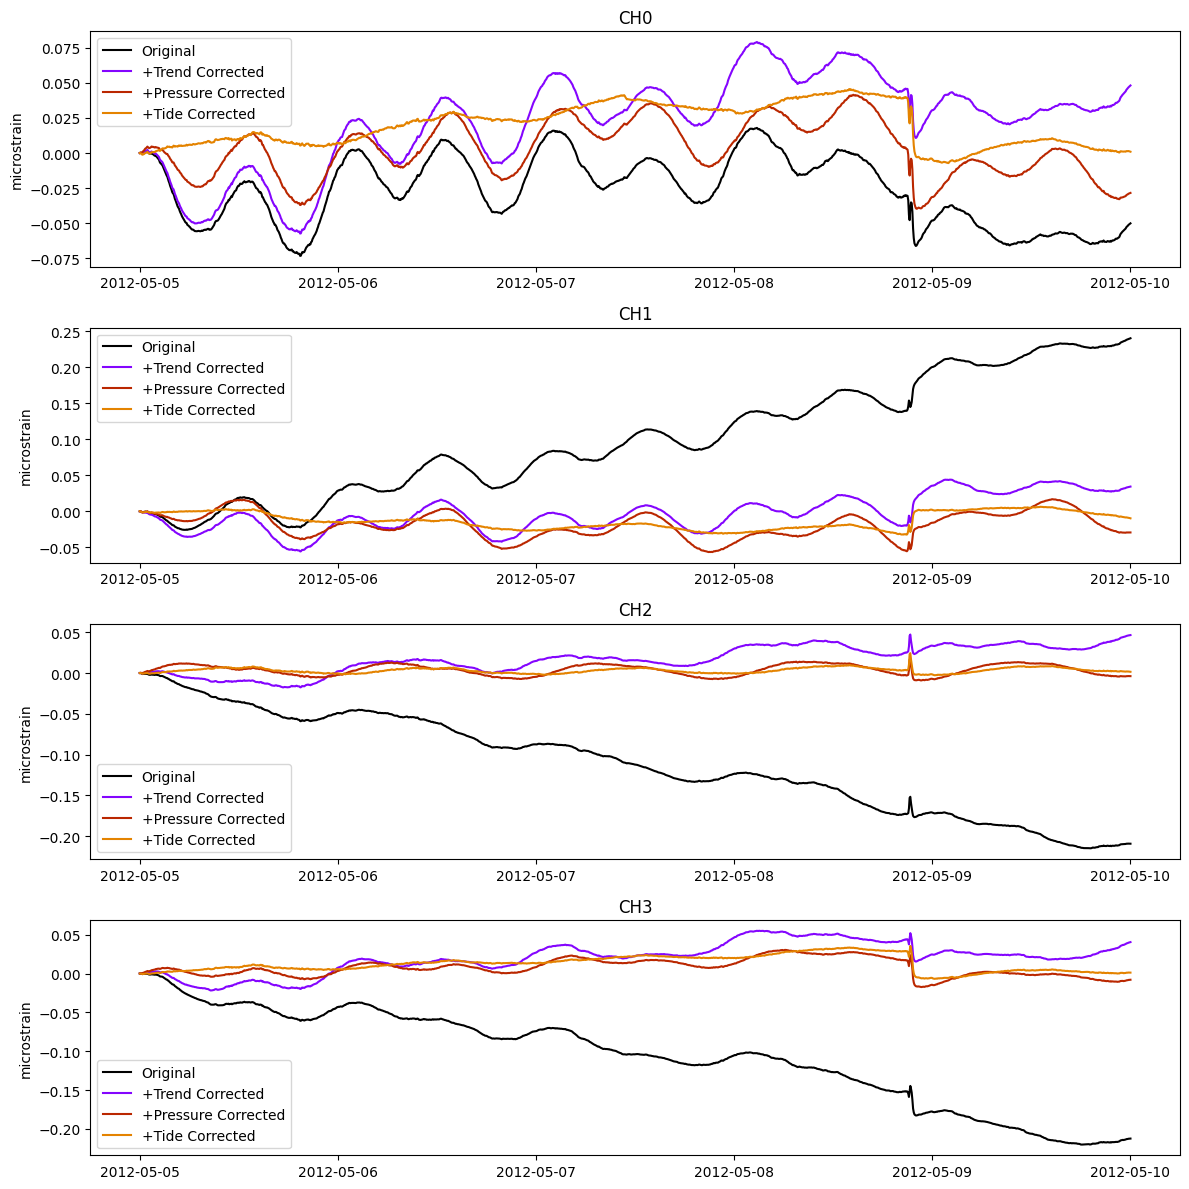

In [21]:
# Plot various applied corrections
p1 = gauge_microstrain.apply_corrections([trend_c])
p2 = gauge_microstrain.apply_corrections([trend_c,atmp_c])
gauge_strain_corr = gauge_microstrain.apply_corrections([trend_c,atmp_c,tide_c])

plot_timeseries_comparison([gauge_microstrain,p1,p2,gauge_strain_corr],zero=True,
                           names=['Original','+Trend Corrected','+Pressure Corrected','+Tide Corrected'])

### Offset correction


In [22]:
# Calculate offsets via first differencing above a cutoff limit 
# adjusted to the noise of the data

offset_c = gauge_strain_corr.calculate_offsets(limit_multiplier=100,cutoff_percentile=0.75)


Calculating offsets using cutoff percentile of 0.75 and limit multiplier of 100.
Using offset limits of [0.016846, 0.014044, 0.011213, 0.011822]
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%


Applying corrections
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%


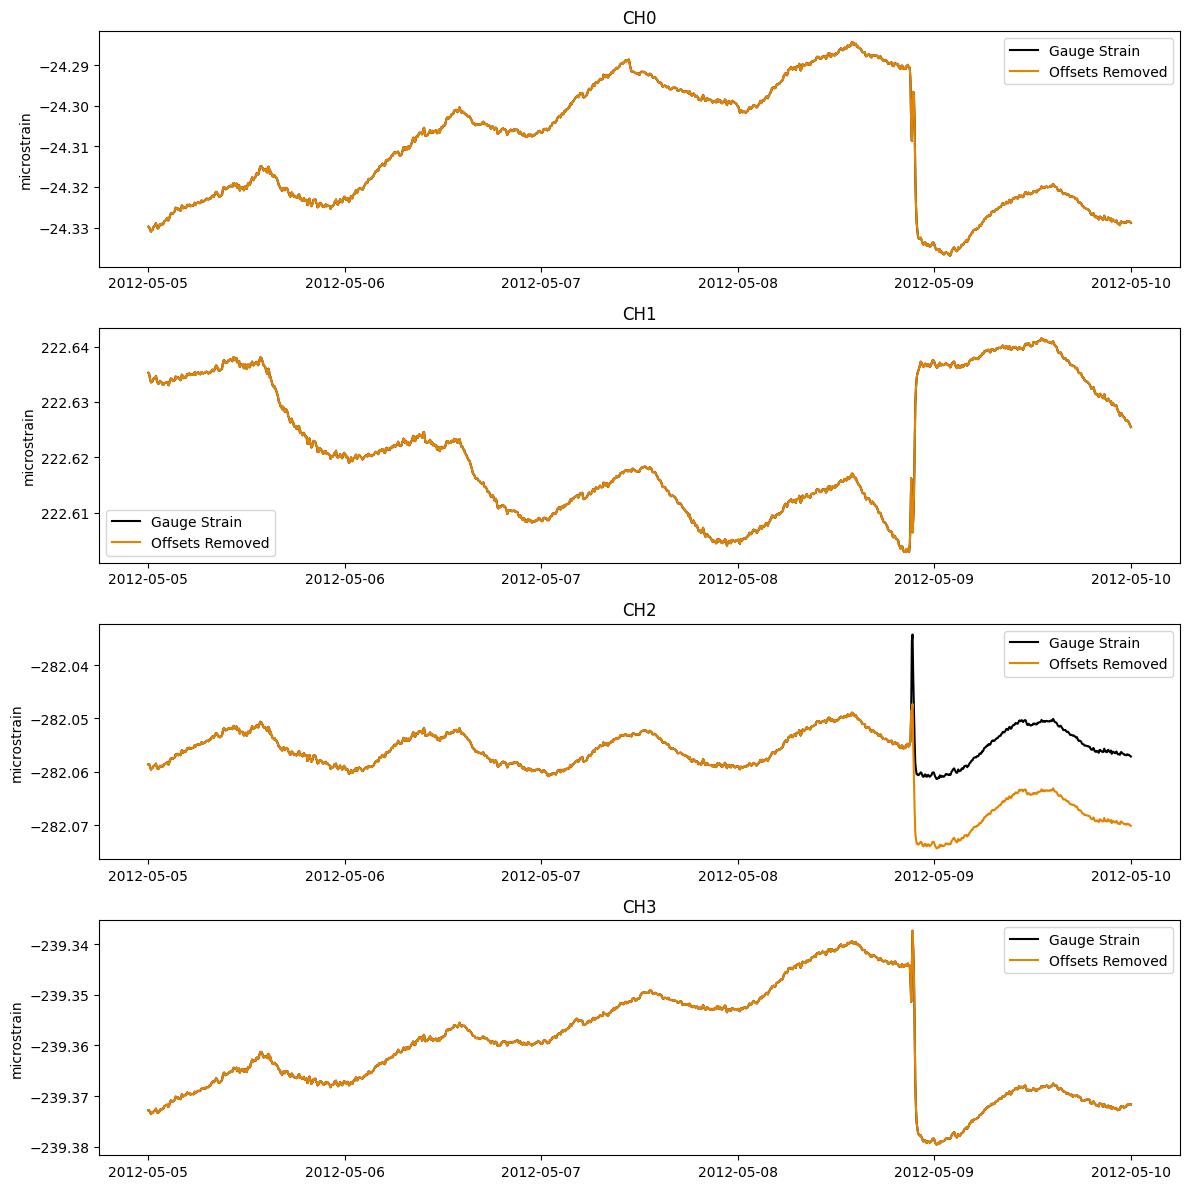

In [23]:
# Plot the offset corrections
# try adjusting the offset calculation parameters in the previous cell to see their effect

plot_timeseries_comparison([gauge_strain_corr,gauge_strain_corr.apply_corrections([offset_c])],
                           names=['Gauge Strain','Offsets Removed'])

**Whether you choose to apply these offsets is up to you, depending on your purpose forusing the data.**

## Tectonic or Nontectonic?



In [24]:
# First, let's transform the corrected gauge strain to regional strain
reg_strain_corr = gauge_strain_corr.apply_calibration_matrix(meta.strain_matrices['ER2010'])

Applying None matrix:
 [[-0.88182914 -0.81225113 -0.57421371 -0.60171802]
 [ 0.47546729 -0.31102462 -0.63122543 -0.04953135]
 [ 0.16962093  0.42674938 -0.62218982 -0.47306098]]
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%


In [25]:
# Get the rainfall data
rain = ts_from_mseed(network=network,station=station,location='TS',channel='RRO',start=start,end=end,scale_factor=0.0001)

PB B073 Loading TS RRO from 2012-05-05T00:00:00.00 to 2012-05-10T00:00:00.00 from Earthscope DMC miniseed


    Trace 1. 2012-05-05T00:00:00.000000Z:2012-05-10T00:00:00.000000Z mapping RRO to rain
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
  Converting 999999 gap fill values to nan
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%


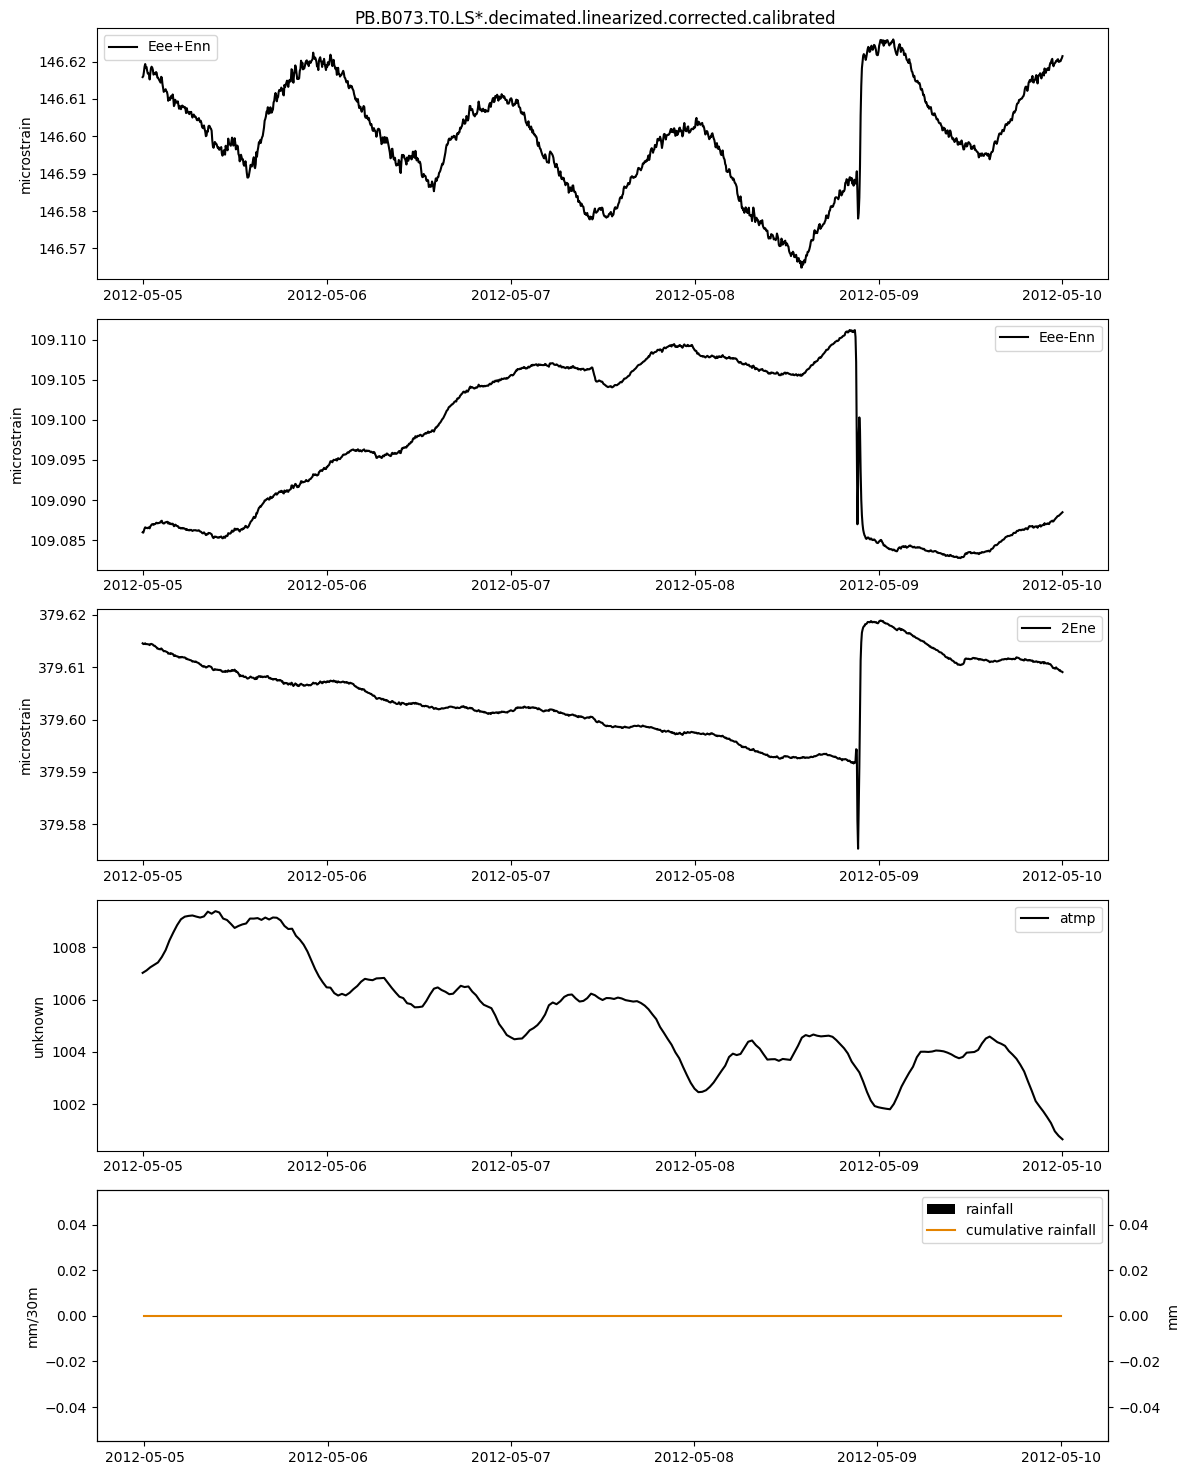

In [26]:
# Plot the rainfall with the corrected regional strains
# Look for residual pressure as well
%matplotlib inline
import matplotlib.pyplot as plt
plt.close('all')
reg_strain_corr.plot(rainfall=rain,atmp=atmp)

## Strain axes


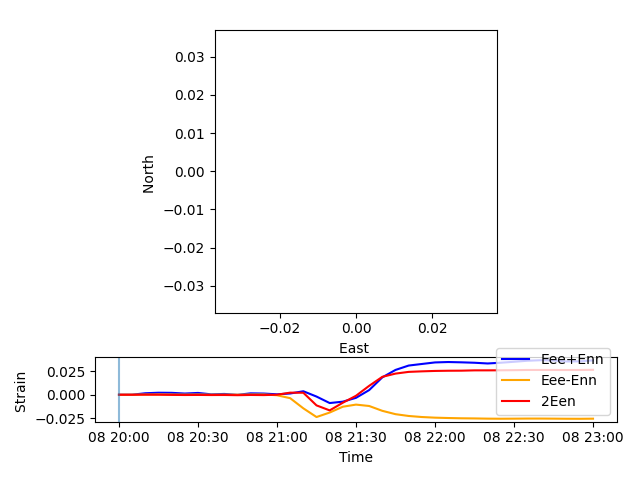

Animation.save using <class 'matplotlib.animation.HTMLWriter'>


In [27]:
# Strain gif
%matplotlib widget
reg_strain_corr.strain_video(start='2012-05-08T20:00:00',end='2012-05-08T23:00:00',
                             interval=100)